<a href="https://colab.research.google.com/github/Takeitiz/Machine-Learning/blob/main/K_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from google.colab import files 
uploaded = files.upload()

Saving ex7_X.npy to ex7_X (1).npy


In [ ]:
def find_closest_centroids(X, centroids):
  K = centroids.shape[0]
  idx = np.zeros(X.shape[0], dtype = int)
  for i in range(X.shape[0]):
    distance = []
    for j in range(K):
      norm_ij = np.linalg.norm(X[i] - centroids[j])
      distance.append(norm_ij)
    idx[i] = np.argmin(distance)
  return idx

In [17]:
X = np.load("ex7_X.npy")

In [18]:
print("First five elements of X are:\n", X[:5])
print("The shape of X is:", X.shape)

First five elements of X are:
 [[1.84207953 4.6075716 ]
 [5.65858312 4.79996405]
 [6.35257892 3.2908545 ]
 [2.90401653 4.61220411]
 [3.23197916 4.93989405]]
The shape of X is: (300, 2)


In [24]:
initial_centroids = np.array([[3,3], [6,2], [8,5]])
idx = find_closest_centroids(X, initial_centroids)
print("First three elements in idx are:", idx[:3])

First three elements in idx are: [0 2 1]


In [34]:
def compute_centroids(X, idx, K):
  m,n = X.shape
  centroids = np.zeros((K, n))
  for i in range(K):
    points = X[idx == i]
    centroids[i] = np.mean(points, axis = 0)
  return centroids

In [45]:
K = 3 
centroids = compute_centroids(X, idx, K)
print("The centroids are:", centroids)
from google.colab import files 
uploaded = files.upload()
from utils import *

The centroids are: [[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]


Saving utils.py to utils (1).py


In [48]:
def run_kMeans(X, initial_centroids, max_iters=10, plot_progress=False):
  m, n = X.shape
  K = initial_centroids.shape[0]
  centroids = initial_centroids
  previous_centroids = centroids
  idx = np.zeros(m)
  for i in range(max_iters):
    print("K-Means iteration %d/%d" % (i, max_iters - 1))
    idx = find_closest_centroids(X, centroids)
    if plot_progress:
      plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i)
      previous_centroids = centroids
    centroids = compute_centroids(X, idx, K)
  plt.show()
  return centroids, idx

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


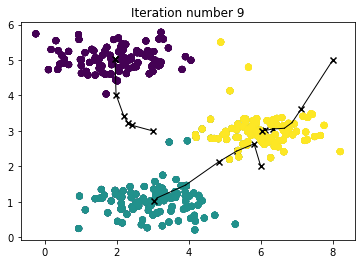

In [49]:
X = np.load("ex7_X.npy")
initial_centroids = np.array([[3,3],[6,2],[8,5]])
K = 3
max_iters = 10
centroids, idx = run_kMeans(X, initial_centroids, max_iters, plot_progress=True)

In [50]:
def kMeans_init_centroids(X, K):
  randidx = np.random.permutation(X.shape[0])
  centroids = X[randidx[:K]]
  return centroids

In [51]:
uploaded = files.upload()

Saving bird_small.png to bird_small.png


In [88]:
original_img = plt.imread('bird_small.png')

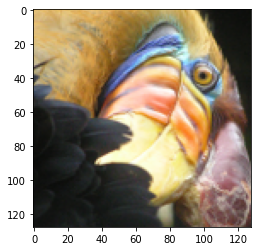

In [92]:
plt.imshow(original_img)

In [91]:
print("Shape of original_img is:", original_img.shape)

Shape of original_img is: (128, 128, 3)


In [93]:
original_img = original_img / 255
X_img = np.reshape(original_img, (original_img.shape[0] * original_img.shape[1], 3))

In [94]:
K = 16
max_iters = 10
initial_centroids = kMeans_init_centroids(X_img, K)
centroids, idx = run_kMeans(X_img, initial_centroids, max_iters)

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


In [95]:
print("Shape of idx:", idx.shape)
print("Closet centroid for the first five elements:", idx[:5])

Shape of idx: (16384,)
Closet centroid for the first five elements: [10 10 10 10 10]


In [96]:
X_recovered = centroids[idx, :]
X_recovered = np.reshape(X_recovered, original_img.shape)
X_recovered.shape 

(128, 128, 3)

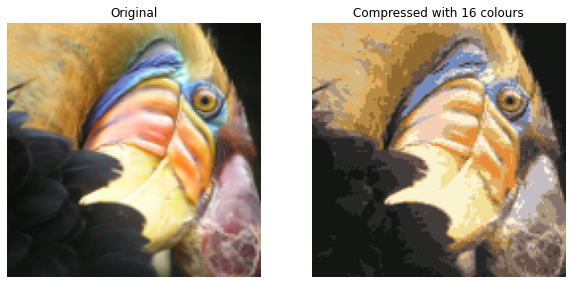

In [98]:
fig, ax = plt.subplots(1,2, figsize=(10,10))
plt.axis('off')
ax[0].imshow(original_img*255)
ax[0].set_title('Original')
ax[0].set_axis_off()
ax[1].imshow(X_recovered*255)
ax[1].set_title('Compressed with %d colours'%K)
ax[1].set_axis_off()

Tada vậy là xong K-means clustering 